In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#import ggplot as ggplot
from plotnine.data import economics

In [2]:
# Raw data file
file_to_load = "user_profiles.csv"

# Read purchasing file and store into pandas data frame
working_df= pd.read_csv(file_to_load)

working_df['offspring'].unique()


array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [3]:
working_df = working_df.astype(object).replace(np.nan, 'None')

working_df = working_df.replace({'doesn&rsquo;t have kids, but might want them': 'does not have kids, but might want them',
    'doesn&rsquo;t want kids': 'does not want kids',
    'doesn&rsquo;t have kids, but wants them': 'does not have kids, but wants them',
    'doesn&rsquo;t have kids': 'does not have kids',
    'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 'does not have kids, and does not want any',
    'has kids, but doesn&rsquo;t want more': 'has kids, but does not want more',
    'has a kid, but doesn&rsquo;t want more': 'has a kid, but does not want more',
    'None': 'declined to answer'
    'a little extra','full figured': 'curvy',
    'rather not say': 'declined to answer',
    'jacked': 'athletic',
    'thin': 'skinny',
    'used up': 'overweight',
    'declined to answerlittle extra': 'declined to answer',
    'a little extra' : 'curvy', 'strictly anything' : 'anything', 'mostly anything':'anything', 'mostly other': 'anything',
    'strictly vegetarian': 'vegetarian', 'mostly vegetarian': 'vegetarian', 'strictly vegan': 'vegan', 'mostly vegan' : 'vegan',
    'strictly other': 'other', 'mostly halal' : 'halal', 'strictly halal': 'halal', 'mostly kosher' : 'kosher', 'strictly kosher' : 'kosher',
    'socially':'rarely', 'very often':'rarely', 'often':'rarely'})

working_df

,Unnamed: 0,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,0,22,curvy,anything,rarely,never,declined to answer,"asian, white",75.0,29592,...,"south san francisco, california","does not have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,1,35,average,anything,rarely,sometimes,college/university,white,70.0,48630,...,"oakland, california","does not have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,2,38,skinny,anything,rarely,declined to answera little extra,masters program,declined to answera little extra,68.0,60812,...,"san francisco, california",declined to answera little extra,straight,has cats,declined to answera little extra,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,3,23,skinny,vegetarian,rarely,declined to answera little extra,declined to answer,white,71.0,18578,...,"berkeley, california",does not want kids,straight,likes cats,declined to answera little extra,m,pisces,no,"english, german (poorly)",single
4,4,29,athletic,declined to answera little extra,rarely,never,college/university,"asian, black, other",66.0,94691,...,"san francisco, california",declined to answera little extra,straight,likes dogs and likes cats,declined to answera little extra,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59941,59,declined to answera little extra,declined to answera little extra,rarely,never,college/university,declined to answera little extra,62.0,16612,...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59942,59942,24,fit,anything,rarely,sometimes,declined to answer,"white, other",72.0,118254,...,"san francisco, california",does not have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59943,59943,42,average,anything,not at all,never,masters program,asian,71.0,42318,...,"south san francisco, california",does not have kids,straight,declined to answera little extra,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,59944,27,athletic,anything,rarely,rarely,declined to answer,"asian, black",73.0,218886,...,"san francisco, california","does not have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single


In [4]:
working_df['pets'].unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats',
       'declined to answera little extra', 'has dogs and likes cats',
       'likes dogs and has cats', 'likes dogs and dislikes cats',
       'has dogs', 'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [5]:
working_df['body_type'].unique()

array(['curvy', 'average', 'skinny', 'athletic', 'fit',
       'declined to answera little extra', 'declined to answer',
       'overweight'], dtype=object)

In [6]:
working_df['drugs'].unique()

array(['never', 'sometimes', 'declined to answera little extra', 'rarely'],
      dtype=object)

In [7]:
working_df['drinks'].unique()

array(['rarely', 'not at all', 'declined to answera little extra',
       'desperately'], dtype=object)

In [8]:
working_df['diet'].unique()

array(['anything', 'vegetarian', 'declined to answera little extra',
       'vegan', 'other', 'halal', 'kosher'], dtype=object)

In [9]:
working_df['orientation'].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

In [10]:
print(working_df.columns)

Index(['Unnamed: 0', 'age', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'height', 'income', 'job', 'last_online',
       'location', 'offspring', 'orientation', 'pets', 'religion', 'sex',
       'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [11]:
# to check the number of missing values in each column
working_df.isna().sum()

Unnamed: 0     0
age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64

In [12]:
# to count each value in the column 'income'
working_df.income.value_counts()

0         273
63397       6
32337       6
19001       5
39161       4
         ... 
128766      1
80546       1
60944       1
178163      1
100804      1
Name: income, Length: 50707, dtype: int64

# Religin

In [13]:
working_df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it',
       'declined to answera little extra', 'atheism', 'christianity',
       'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious abou

In [14]:
working_df['religion_cleaned'] = working_df.religion.str.split().str.get(0)
working_df['religion_cleaned']


0         agnosticism
1         agnosticism
2            declined
3            declined
4            declined
             ...     
59941     catholicism
59942     agnosticism
59943    christianity
59944     agnosticism
59945     catholicism
Name: religion_cleaned, Length: 59946, dtype: object

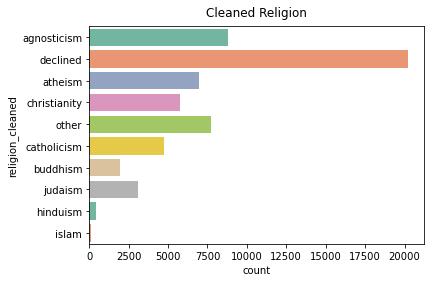

In [15]:
fig, ax = plt.subplots()
ax = sns.countplot(data = working_df, y = 'religion_cleaned', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Cleaned Religion", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

# Sign

In [16]:
working_df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter',
       'declined to answera little extra',
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capri

In [17]:
working_df['sign_cleaned'] = working_df.sign.str.split().str.get(0)
working_df['sign_cleaned'] 

0             gemini
1             cancer
2             pisces
3             pisces
4           aquarius
            ...     
59941         cancer
59942            leo
59943    sagittarius
59944            leo
59945         gemini
Name: sign_cleaned, Length: 59946, dtype: object

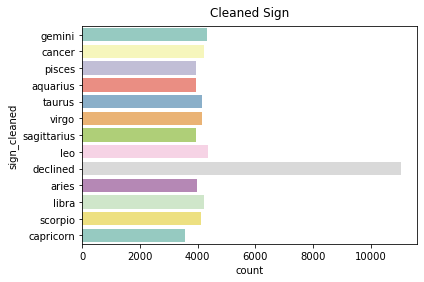

In [18]:
fig, ax = plt.subplots()
ax = sns.countplot(data = working_df, y = 'sign_cleaned', palette = 'Set3')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Cleaned Sign", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

In [19]:
working_df.head()

,Unnamed: 0,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,orientation,pets,religion,sex,sign,smokes,speaks,status,religion_cleaned,sign_cleaned
0,0,22,curvy,anything,rarely,never,declined to answer,"asian, white",75.0,29592,...,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,agnosticism,gemini
1,1,35,average,anything,rarely,sometimes,college/university,white,70.0,48630,...,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,agnosticism,cancer
2,2,38,skinny,anything,rarely,declined to answera little extra,masters program,declined to answera little extra,68.0,60812,...,straight,has cats,declined to answera little extra,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,declined,pisces
3,3,23,skinny,vegetarian,rarely,declined to answera little extra,declined to answer,white,71.0,18578,...,straight,likes cats,declined to answera little extra,m,pisces,no,"english, german (poorly)",single,declined,pisces
4,4,29,athletic,declined to answera little extra,rarely,never,college/university,"asian, black, other",66.0,94691,...,straight,likes dogs and likes cats,declined to answera little extra,m,aquarius,no,english,single,declined,aquarius


# Body Type

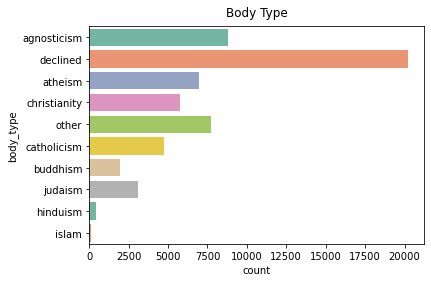

In [21]:
working_df['body_type'] = working_df.body_type.str.split().str.get(0)
fig, ax = plt.subplots()
ax = sns.countplot(data = working_df, y = 'body_type', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Body Type", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()


In [22]:
#Orientation in percentage
def show_percentage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

def show_percentage2(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size=10, va="center")

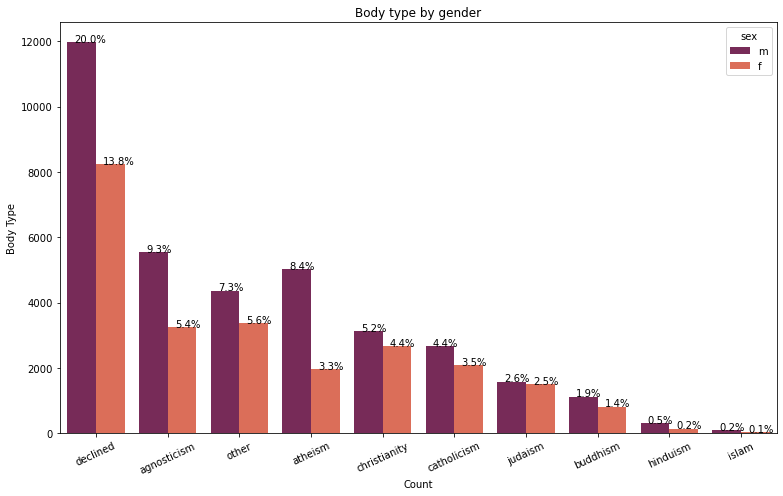

In [23]:
#Body type plot
plt.figure(figsize=(11, 7))
ax = sns.countplot(x='body_type', data=working_df,
hue='sex',
palette='rocket',
order=working_df['body_type'].value_counts().iloc[:10].index)
# order= ["athletic", "fit", "curvy", "a little extra", "full figured", "skinny", "thin", "average", "overweight", "declined to answer"])
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type')
show_percentage(ax, working_df)
plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

In [24]:
working_df.dtypes

Unnamed: 0           int64
age                  int64
body_type           object
diet                object
drinks              object
drugs               object
education           object
ethnicity           object
height              object
income               int64
job                 object
last_online         object
location            object
offspring           object
orientation         object
pets                object
religion            object
sex                 object
sign                object
smokes              object
speaks              object
status              object
religion_cleaned    object
sign_cleaned        object
dtype: object

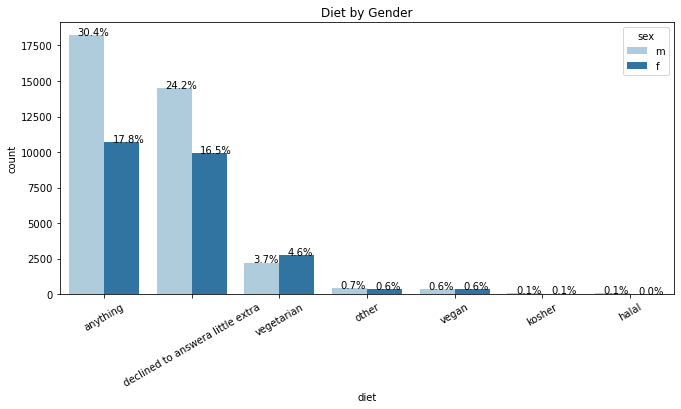

In [25]:
#Different diets by gender. Represent using suitable graph
plt.figure(figsize=(11, 5))
ax = sns.countplot(x='diet', data=working_df,
hue='sex', palette='Paired',
order = working_df['diet'].value_counts().iloc[:10].index)
plt.xticks(rotation = 30)
ax.set_title("Diet by Gender")
show_percentage(ax, working_df)

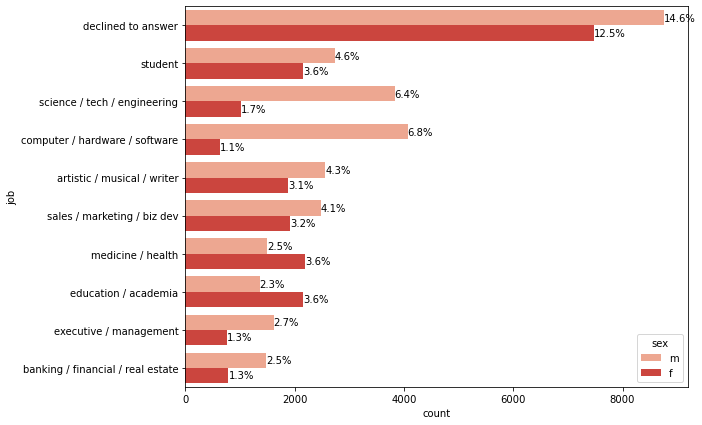

In [26]:
# Compare jobs of males and females. Represent using suitable graphs
plt.figure(figsize=(9, 7))
ax = sns.countplot(y='job', data= working_df,
hue='sex', palette='Reds',
order = working_df['job'].value_counts().iloc[:10].index)
show_percentage2(ax, working_df)
plt.show()

In [28]:
working_df.shape

(59946, 24)

In [32]:
working_df.head()

,Unnamed: 0,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,orientation,pets,religion,sex,sign,smokes,speaks,status,religion_cleaned,sign_cleaned
0,0,22,agnosticism,anything,rarely,never,declined to answer,"asian, white",75.0,29592,...,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,agnosticism,gemini
1,1,35,agnosticism,anything,rarely,sometimes,college/university,white,70.0,48630,...,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,agnosticism,cancer
2,2,38,declined,anything,rarely,declined to answera little extra,masters program,declined to answera little extra,68.0,60812,...,straight,has cats,declined to answera little extra,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,declined,pisces
3,3,23,declined,vegetarian,rarely,declined to answera little extra,declined to answer,white,71.0,18578,...,straight,likes cats,declined to answera little extra,m,pisces,no,"english, german (poorly)",single,declined,pisces
4,4,29,declined,declined to answera little extra,rarely,never,college/university,"asian, black, other",66.0,94691,...,straight,likes dogs and likes cats,declined to answera little extra,m,aquarius,no,english,single,declined,aquarius


In [33]:
working_df.to_csv('OKcupid_cleaned_up.csv', index=False)